<a href="https://colab.research.google.com/github/Faizaanp/stock-predictions/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



MinMaxScaler: covnerts the give range of input into 0,1

eg: nos= [10, 20, 30, 40], min = 10 and max = 40
minmax ouput: [0.0, 0.33, 0.66, 1.0]

Sequential: used to build neuarl networks

Dense: simplest from of neuarl network, every node connected to every other node in the next layer
LSTM: Long Short-Term Memory

In [ ]:
#libs import
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
df = yf.download('AAPL', start='2012-01-01', end='2022-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.shape

(2517, 5)

Text(0, 0.5, 'Close Price')

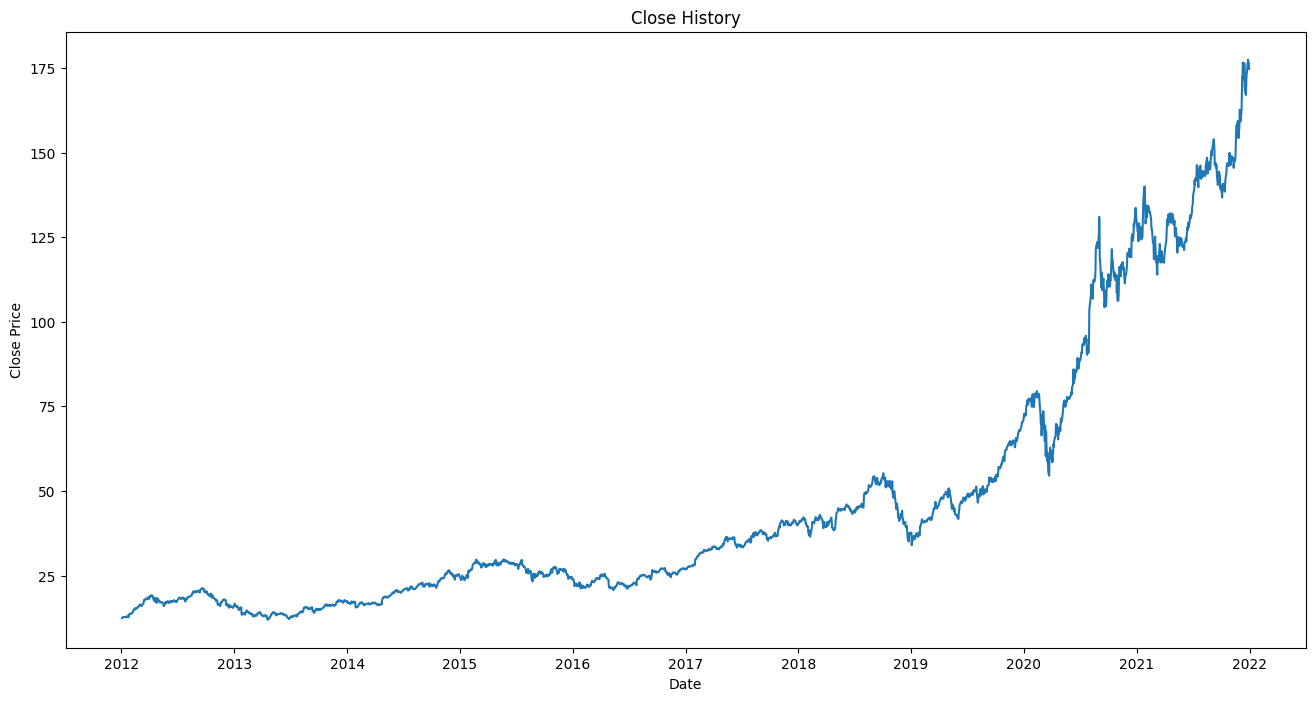

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

In [ ]:
print(df.columns)
print(df.head())

close_data = df[['Close']]
close_data.head()

dataset = close_data.values
dataset

training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.388997  12.427258  12.321815  12.333866  302220800
2012-01-04  12.455577  12.492935  12.330250  12.351941  260022000
2012-01-05  12.593860  12.609525  12.432380  12.501070  271269600
2012-01-06  12.725509  12.736053  12.629706  12.646276  318292800
2012-01-09  12.705325  12.886688  12.693877  12.818903  394024400


2014

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00271905],
       [0.00312138],
       [0.003957  ],
       ...,
       [0.9943517 ],
       [0.98733578],
       [0.98359044]])

In [ ]:
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

print(x_train[0:10])
print(y_train[0:10])


[array([0.00271905, 0.00312138, 0.003957  , 0.00475254, 0.00463057,
       0.00490548, 0.00477986, 0.00456869, 0.00428104, 0.00517128,
       0.00597412, 0.00572652, 0.00437023, 0.00566463, 0.00439029,
       0.00916912, 0.00879954, 0.009282  , 0.01032515, 0.01095687,
       0.01090406, 0.01070929, 0.01153945, 0.01232044, 0.01320522,
       0.01463429, 0.01763634, 0.01768186, 0.01935308, 0.02060194,
       0.01845556, 0.01928211, 0.01926565, 0.02158321, 0.02125372,
       0.02186355, 0.02295948, 0.02356936, 0.02532616, 0.02660596,
       0.02697551, 0.0271048 , 0.02491656, 0.0243886 , 0.02446686,
       0.02652408, 0.02710298, 0.02834639, 0.03127739, 0.03518789,
       0.03445598, 0.03445785, 0.03728508, 0.03816992, 0.03754   ,
       0.0369647 , 0.03636574, 0.03835556, 0.03972094, 0.0402926 ]), array([0.00312138, 0.003957  , 0.00475254, 0.00463057, 0.00490548,
       0.00477986, 0.00456869, 0.00428104, 0.00517128, 0.00597412,
       0.00572652, 0.00437023, 0.00566463, 0.00439029, 0.00

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

x_train.shape

(1954, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 54s 26ms/step - loss: 6.2666e-04


In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [ ]:
print(y_test[0:10])
print(x_test[0:10])

[[72.66270447]
 [72.32097626]
 [73.48435211]
 [75.04521179]
 [75.21485901]
 [76.82177734]
 [75.78444672]
 [75.45968628]
 [76.40492249]
 [77.25078583]]
[array([0.25936939, 0.26383771, 0.27277428, 0.27227777, 0.2714747 ,
       0.27008745, 0.27141629, 0.2730663 , 0.27905326, 0.27825014,
       0.28295205, 0.28353616, 0.28791685, 0.29152363, 0.28311266,
       0.2830689 , 0.29110013, 0.30140936, 0.30386254, 0.30332224,
       0.30348281, 0.30781802, 0.30885802, 0.31187516, 0.31152363,
       0.31519974, 0.31251955, 0.31708911, 0.31905177, 0.31786544,
       0.31332509, 0.31159684, 0.31125985, 0.31798254, 0.31493613,
       0.32013543, 0.31927136, 0.31474572, 0.30784739, 0.31120125,
       0.31682544, 0.3243389 , 0.31878806, 0.32107271, 0.32442677,
       0.32543731, 0.33084182, 0.33774008, 0.3385455 , 0.33756433,
       0.33797442, 0.33712501, 0.34380368, 0.34419906, 0.35245935,
       0.35229831, 0.3548174 , 0.35793712, 0.36775007, 0.3634733 ]), array([0.26383771, 0.27277428, 0.27227777,

In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape

(503, 60, 1)

In [ ]:
prediction = model.predict(x_test)
prediction = prediction.reshape(prediction.shape[0], prediction.shape[1])
prediction = scaler.inverse_transform(prediction)

print(prediction.shape)

print(prediction)
print(len([prediction]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(503, 60)
[[ 55.837715  61.92292   62.924564 ...  76.99613   78.56018   78.214836]
 [ 56.49539   63.393513  63.13293  ...  78.56017   78.21482   78.55201 ]
 [ 57.812706  63.619972  62.96749  ...  78.21482   78.551994  78.32366 ]
 ...
 [131.39417  154.84256  152.92905  ... 186.38268  190.12888  189.60147 ]
 [133.21597  156.0259   154.22847  ... 190.12883  189.60143  189.34111 ]
 [134.03902  157.39172  154.05623  ... 189.60141  189.34106  188.18301 ]]
1


In [ ]:
y_test = y_test[:prediction.shape[0]]
rmse = np.sqrt(np.mean((prediction - y_test) ** 2))
rmse

12.032841886400167

fatal: not a git repository (or any of the parent directories): .git
